<a href="https://colab.research.google.com/github/yydevelop/kaggle/blob/main/us_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/MyDrive/probspace')

Mounted at /content/gdrive


In [2]:
#環境確認
import pandas as pd
import numpy as np
import statsmodels
!python3 --version
print(pd.__version__)
print(np.__version__)
print(statsmodels.__version__)
import matplotlib
print(matplotlib.__version__)

Python 3.7.12
1.1.5
1.19.5
0.10.2
3.2.2


In [3]:
#データの読み込みと前処理
import pandas as pd
train_data = pd.read_csv("train_data.csv", index_col='Date')
print(train_data.shape)

(419, 3278)


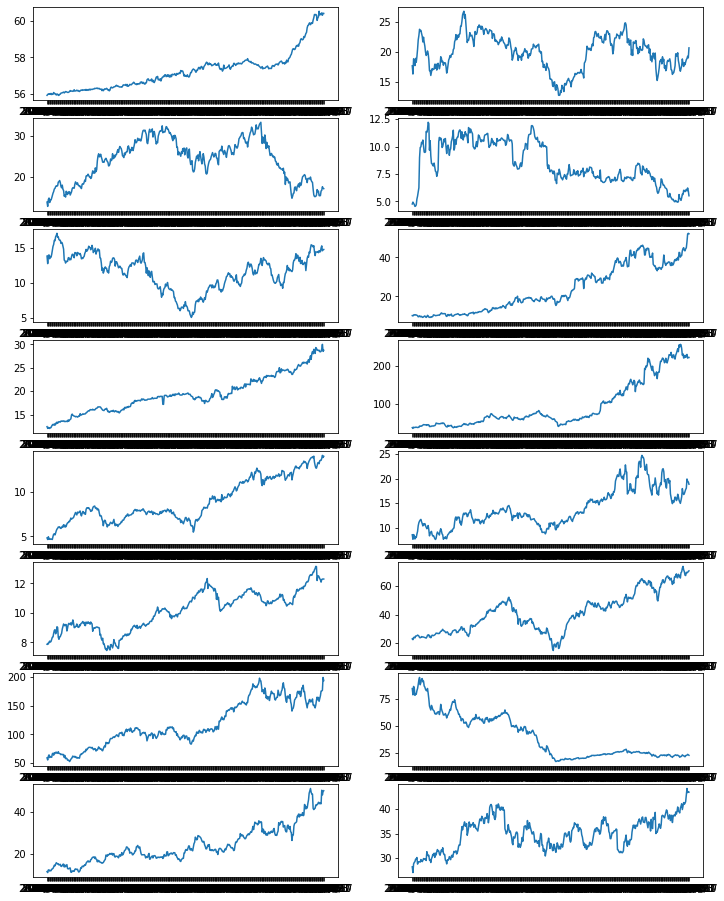

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(8, 2, figsize=(12, 16))
for i in range(16):
    ax[i//2, i%2].plot(train_data.iloc[:, i])

In [ ]:
# from statsmodels.tsa.api import VAR
# m=VAR(train_data.values[:-50])
# r=m.fit(5)
# p=r.forecast(train_data.values[:-50],50) 
# plt.plot(train_data.iloc[:,0])
# plt.plot(range(len(train_data.values)-50,len(train_data.values)),p[:,0],c="tab:blue",linestyle="--")

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#eval_model = VAR(train_data.values[:-1])
#eval_results = eval_model.fit(5)
# eval_pred = eval_results.forecast(train_data.values[:-1], 1)
# eval_pred[eval_pred < 0] = 0
#print(np.sqrt(mean_squared_log_error(eval_pred.flatten(), train_data.values[-1])))


In [119]:
submit_df = pd.DataFrame(index=[], columns=['id','y'])

In [120]:
sq_error=0
for i in range(len(train_data.columns)):
#for i in range(1):
  train_data_i = train_data.iloc[:, i].copy().reset_index()
  name = train_data_i.columns[1]
  train_data_i = train_data_i.drop('Date',axis=1)
  train_data_i = train_data_i.set_axis(['today'], axis=1)
  train_data_i['old1']=train_data_i['today'].shift(1)
  train_data_i = train_data_i.dropna()
  #train_data_i['old2']=train_data_i['today'].shift(2)
  #train_data_i['old3']=train_data_i['today'].shift(3)
  #train_data_i['old4']=train_data_i['today'].shift(4)
  train_data_i['mean3']=train_data_i['old1'].rolling(3).mean()
  train_data_i = train_data_i.dropna()
  
  X = train_data_i.drop('today',axis=1)
  Y = train_data_i[['today']]
  X_train = X.iloc[:len(X)-2,:].copy()
  X_test = X.iloc[len(X)-1:,:].copy()
  y_train = Y.iloc[:len(Y)-2,:].copy()
  y_test = Y.iloc[len(Y)-1:,:].copy()

  model= LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  #sq_error = (np.log1p(y_test.iloc[0,0]) - np.log1p(y_pred[0,0]))
  sq_error = (y_test.iloc[0,0] - y_pred[0,0])**2

  submit_X = train_data_i.drop('old1',axis=1).iloc[len(train_data_i)-1:,:].copy()
  ans = model.predict(submit_X)

  submit_df = submit_df.append({'id':name,'y':ans[0,0]}, ignore_index=True)

print(np.sqrt(sq_error/len(train_data.columns)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

0.06025475722079433


提出データの作成

In [71]:
# pred = eval_results.forecast(train_data.values, 1)
# submit_df = pd.DataFrame(pred, columns=train_data.columns)
# submit_df = submit_df.transpose()
# submit_df.columns = ['y']
# submit_df.index.name = 'id'
# submit_df.where(submit_df['y'] > 0, 0)
# submit_df.to_csv('submission.csv')

In [121]:
print(submit_df)
submit_df.to_csv('submission.csv', index = False)

        id           y
0     VGSH   60.425975
1      JEF   20.693708
2      IVZ   17.165432
3     KTCC    5.584248
4      FBZ   14.717260
...    ...         ...
3273   TYG   17.064707
3274  VIRC    3.774524
3275   BIS   15.340668
3276  WOOD   64.585909
3277  MASI  152.902693

[3278 rows x 2 columns]
